<h1><center><b><u>Downpour Decoder:Predicting Flood With ML</u></b></center></h1>

**<u>Introduction:</u>**

Floods are a recurring natural disaster in the Indian state of Kerala, posing significant risks to lives, livelihoods, and infrastructure. The state's complex topography, coupled with intense monsoon rains, amplifies the vulnerability to flooding, making accurate prediction and mitigation strategies imperative. In response to this challenge, this project aims to develop a machine learning (ML) model for predicting floods in Kerala.

**<u>Objective:</u>**
The primary objective of this project is to leverage machine learning algorithms to forecast and anticipate flood occurrences in Kerala. By analyzing historical data on rainfall, the model aims to provide timely and accurate predictions of flood events.

**<u>Approach:</u>**
The project will employ a variety of machine learning techniques, to build predictive models. It will utilize datasets containing historical rainfall data, use patterns and demographic information. Feature engineering, data preprocessing, and model selection will be key stages in the development process.

- The rate of change in river stage on a real-time basis, which can help indicate the severity and immediacy of the threat.
- 
Knowledge about the type of storm producing the moisture, such as duration, intensity and areal extent, which can be valuable for determining possible severity of the flooding. 

- Knowledge about the characteristics of a river's drainage basin, such as soil-moisture conditions, ground temperature, snowpack, topography, vegetation cover, and impermeable land area, which can help to predict how extensive and damaging a flood might become.

- **<u>Rainfall Amount</u>:**
The more rain that falls over a specific area, the greater the volume of water that needs to be absorbed by the soil or drained by rivers.
If the rainfall amount exceeds the capacity for absorption and drainage, flooding can occur.  


- **<u>Rainfall Intensity</u>:**
Heavy rain falling in a short period (intense rainfall) overwhelms the drainage system's ability to handle the water influx.
This can lead to flash floods, which occur rapidly and can be particularly dangerous.

- **<u>Ground Saturation</u>:**
If the ground is already saturated from recent rainfall, it has less capacity to absorb additional rainwater.
This means even moderate rainfall after a wet period can trigger flooding.

#### Flood Risk = Rainfall Amount x Intensity / Drainage Capacity

#### Higher Flood Risk: Greater rainfall amount, higher intensity, or lower drainage capacity (e.g., clogged drains, saturated soil) all contribute to a higher flood risk.

- well this is not the actual way of calculation but hereby giving an idea about the Flood Risk

### Drainage Capacity

- drainage capacity refers to the ability of an area to absorb and remove excess water.

- **<u>Soil Infiltration:</u>** This is the rate at which water can soak into the ground. Factors like soil type, vegetation cover, and compaction influence infiltration capacity. Sandy soils with good drainage have high infiltration rates, while clay soils or compacted areas have lower rates.
  
- **<u>Surface Drainage:</u>** This refers to the ability of the land surface to move water towards streams, rivers, or drainage channels. Factors like slope, presence of gutters and channels, and the extent of paved surfaces all play a role. Steeper slopes, well-maintained drainage systems, and less pavement create better surface drainage.
  
- **<u>Channel Capacity:</u>** This is the maximum amount of water that streams, rivers, or drainage channels can carry away. Channel size, depth, and slope determine their capacity. Wider and deeper channels with steeper slopes have a higher capacity to handle water flow.


The overall drainage capacity of an area is a combination of these three components. If the rate of rainfall exceeds the combined capacity for infiltration, surface drainage, and channel flow, flooding can occur.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
floods=pd.read_csv('Kerala.csv')

In [4]:
floods

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,KERALA,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,YES
114,KERALA,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,NO
115,KERALA,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,NO
116,KERALA,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,NO


In [5]:
floods.size

1888

In [6]:
floods.shape

(118, 16)

In [7]:
floods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SUBDIVISION       118 non-null    object 
 1   YEAR              118 non-null    int64  
 2   JAN               118 non-null    float64
 3   FEB               118 non-null    float64
 4   MAR               118 non-null    float64
 5   APR               118 non-null    float64
 6   MAY               118 non-null    float64
 7   JUN               118 non-null    float64
 8   JUL               118 non-null    float64
 9   AUG               118 non-null    float64
 10  SEP               118 non-null    float64
 11  OCT               118 non-null    float64
 12  NOV               118 non-null    float64
 13  DEC               118 non-null    float64
 14   ANNUAL RAINFALL  118 non-null    float64
 15  FLOODS            118 non-null    object 
dtypes: float64(13), int64(1), object(2)
memory u

In [8]:
floods.isnull().sum()

SUBDIVISION         0
YEAR                0
JAN                 0
FEB                 0
MAR                 0
APR                 0
MAY                 0
JUN                 0
JUL                 0
AUG                 0
SEP                 0
OCT                 0
NOV                 0
DEC                 0
 ANNUAL RAINFALL    0
FLOODS              0
dtype: int64

In [9]:
floods['FLOODS'].unique()

array(['YES', 'NO'], dtype=object)

In [10]:
floods['SUBDIVISION'].unique()

array(['KERALA', 'KERALA '], dtype=object)

In [11]:
floods['MAR'].unique()

array([5.160e+01, 5.730e+01, 3.100e+00, 3.220e+01, 9.400e+00, 9.900e+00,
       5.570e+01, 3.820e+01, 6.130e+01, 2.330e+01, 1.820e+01, 1.120e+01,
       2.070e+01, 1.810e+01, 4.270e+01, 2.200e+01, 7.940e+01, 3.280e+01,
       3.390e+01, 2.410e+01, 1.500e+01, 1.630e+01, 7.890e+01, 6.660e+01,
       7.690e+01, 2.310e+01, 4.960e+01, 5.130e+01, 5.890e+01, 3.900e+01,
       1.920e+01, 2.860e+01, 3.690e+01, 4.770e+01, 1.160e+02, 5.870e+01,
       5.330e+01, 2.490e+01, 3.800e+00, 1.270e+01, 2.320e+01, 3.840e+01,
       6.160e+01, 1.084e+02, 9.800e+01, 4.820e+01, 4.500e+00, 3.110e+01,
       4.160e+01, 2.080e+01, 1.850e+01, 9.060e+01, 2.820e+01, 1.510e+01,
       2.570e+01, 6.300e+00, 4.440e+01, 1.140e+01, 3.960e+01, 6.980e+01,
       6.720e+01, 2.830e+01, 6.770e+01, 2.460e+01, 8.920e+01, 1.940e+01,
       2.580e+01, 2.000e+01, 2.500e+00, 1.230e+01, 1.600e+01, 6.340e+01,
       2.100e+01, 3.140e+01, 1.170e+01, 2.850e+01, 2.190e+01, 9.000e-01,
       9.530e+01, 2.930e+01, 4.300e+00, 3.810e+01, 

In [12]:
floods['DEC'].unique()

array([4.840e+01, 1.215e+02, 5.900e+01, 3.300e+00, 2.000e-01, 8.600e+01,
       5.280e+01, 1.100e+01, 3.230e+01, 1.000e-01, 8.760e+01, 2.200e+01,
       4.580e+01, 1.352e+02, 1.490e+01, 8.900e+00, 4.160e+01, 5.410e+01,
       5.300e+01, 8.200e+00, 1.580e+01, 2.510e+01, 5.040e+01, 9.880e+01,
       1.620e+01, 6.800e+00, 5.270e+01, 3.940e+01, 8.920e+01, 1.065e+02,
       3.130e+01, 4.230e+01, 4.900e+00, 3.090e+01, 1.860e+01, 1.910e+01,
       2.290e+01, 1.020e+01, 6.010e+01, 8.460e+01, 1.179e+02, 2.430e+01,
       1.800e+01, 2.023e+02, 4.700e+01, 1.920e+01, 1.800e+00, 8.800e+00,
       2.320e+01, 6.690e+01, 5.100e+00, 6.250e+01, 1.980e+01, 9.100e+00,
       2.890e+01, 7.700e+00, 3.400e+01, 2.370e+01, 1.750e+01, 7.690e+01,
       1.780e+01, 1.555e+02, 5.050e+01, 3.110e+01, 3.270e+01, 6.630e+01,
       5.700e+00, 6.230e+01, 1.143e+02, 5.380e+01, 3.600e+00, 1.990e+01,
       3.080e+01, 6.700e+00, 3.900e+01, 2.330e+01, 3.950e+01, 4.330e+01,
       1.080e+01, 6.910e+01, 4.400e+01, 9.500e+00, 

- it is found that there is no any missing value and null value, hence the data is cleaned 

In [13]:
floods['YEAR'].unique()

array([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911,
       1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922,
       1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933,
       1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944,
       1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955,
       1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966,
       1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

In [14]:
floods['SUBDIVISION'].replace({'KERALA ':'KERALA'},inplace=True)

In [15]:
col=floods.columns

In [16]:
col

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', ' ANNUAL RAINFALL', 'FLOODS'],
      dtype='object')

In [17]:
numcols=["YEAR",'JAN','FEB','MAR',"APR",'MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC',' ANNUAL RAINFALL']

In [18]:
def box_out(df,cols):
    for col in cols:
        sns.boxplot(df[col])
        plt.show()
def hist_skew(df,cols):
    for col in cols:
        sns.histplot(df[col],kde=True,color='purple')
        plt.show()

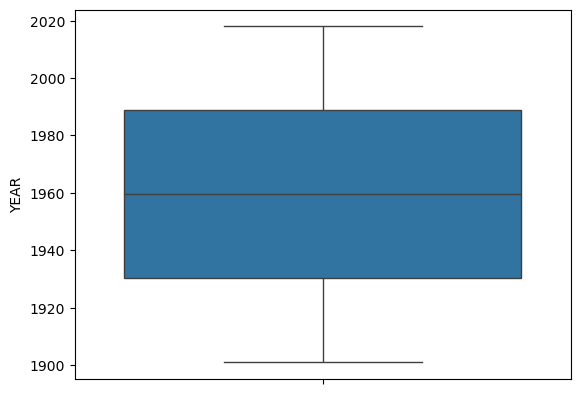

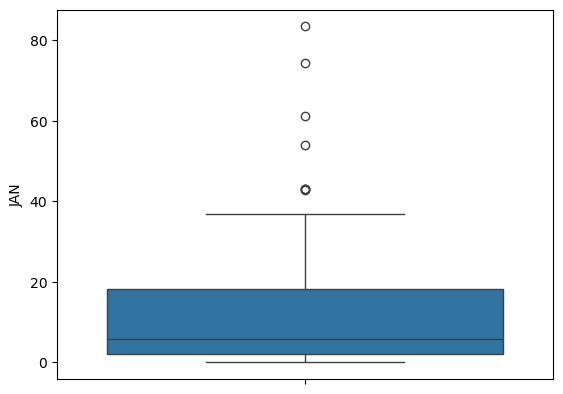

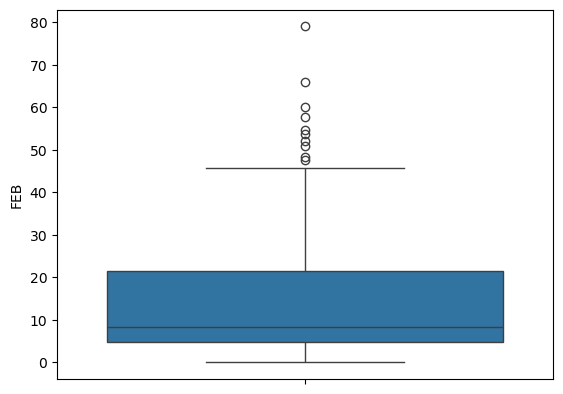

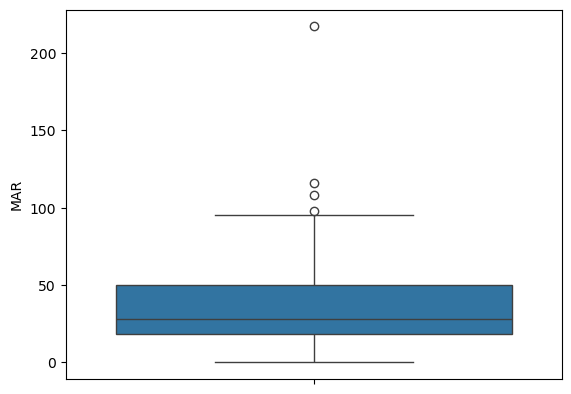

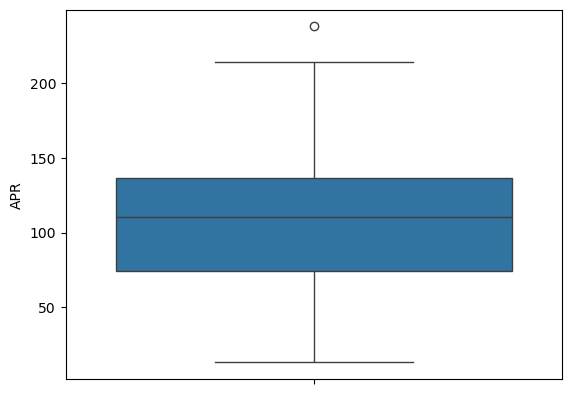

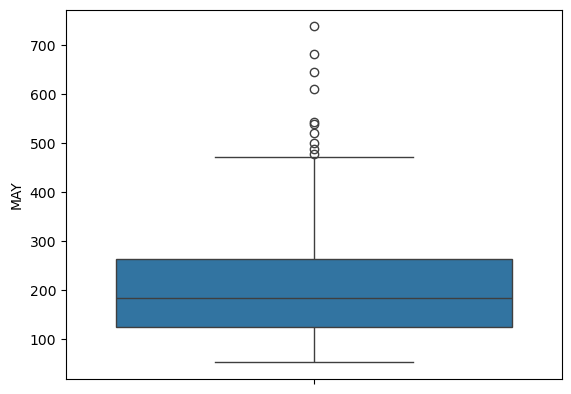

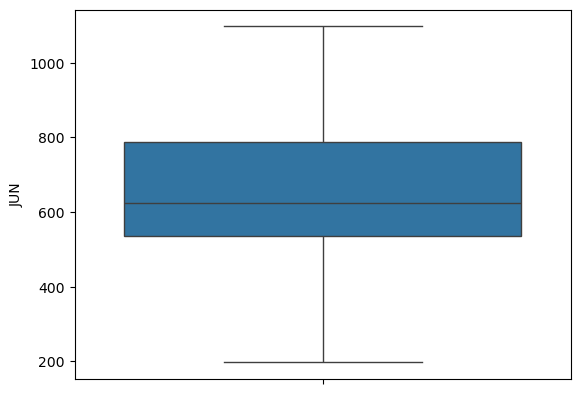

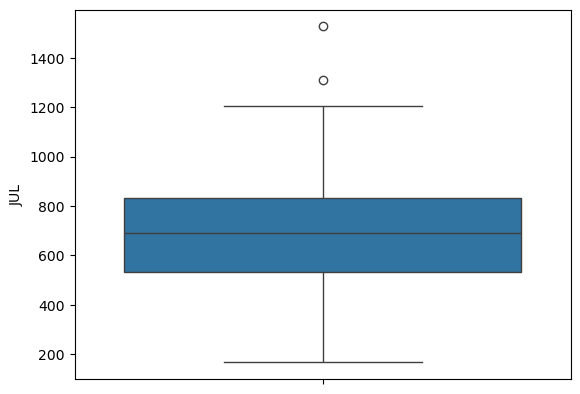

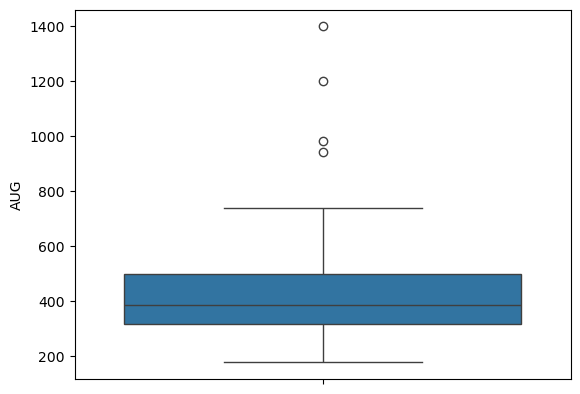

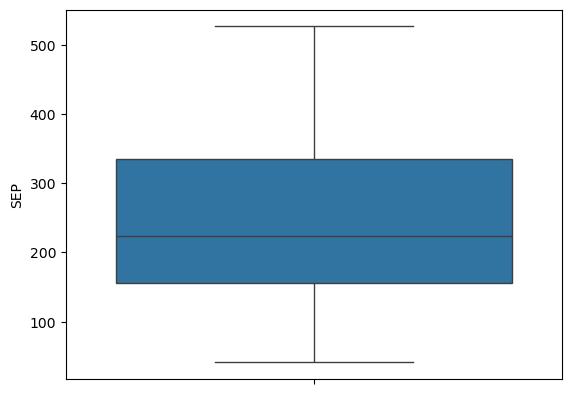

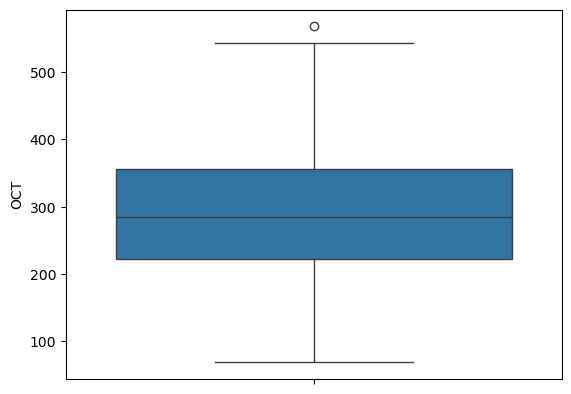

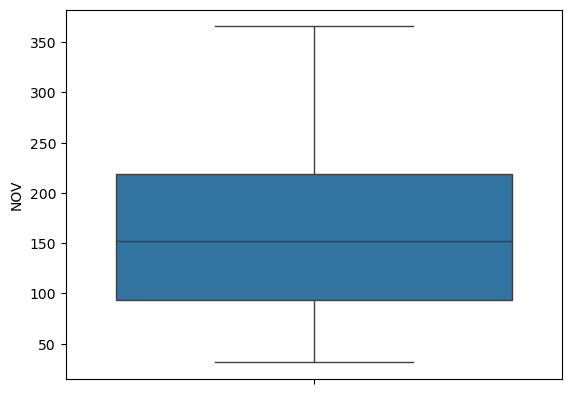

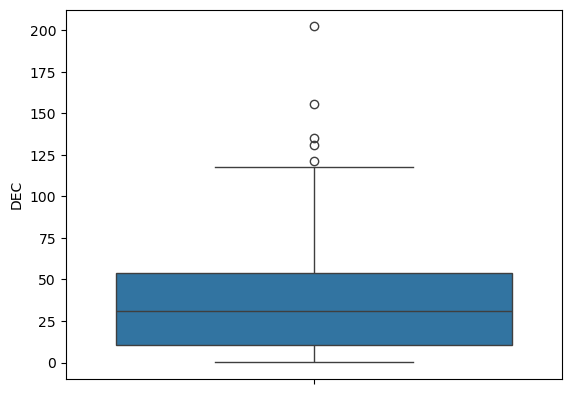

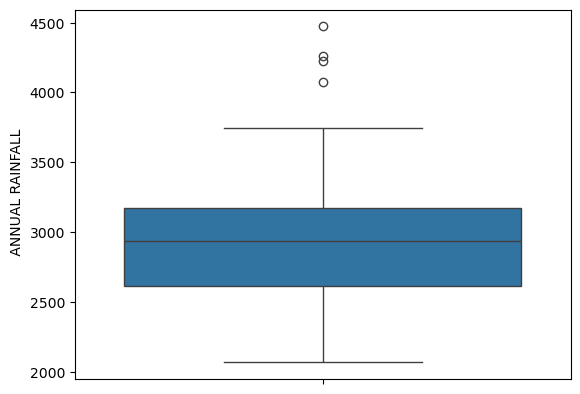

In [19]:
box_out(floods,numcols)

jan, feb>,mar<,apr<<,may>,jul,aug,oct<<,dec,annual year

In [20]:
col=['JAN','FEB','MAR','APR','MAY','JUL','AUG','OCT','DEC',' ANNUAL RAINFALL']

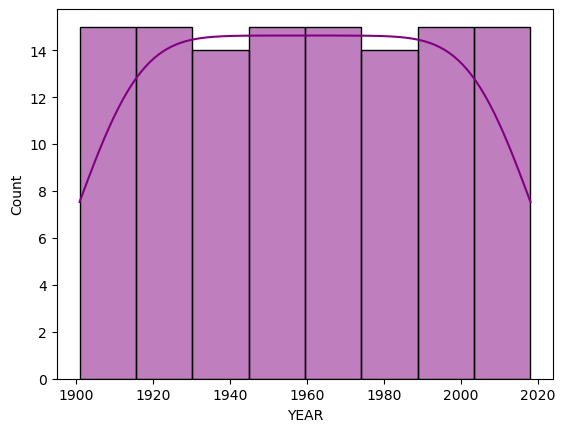

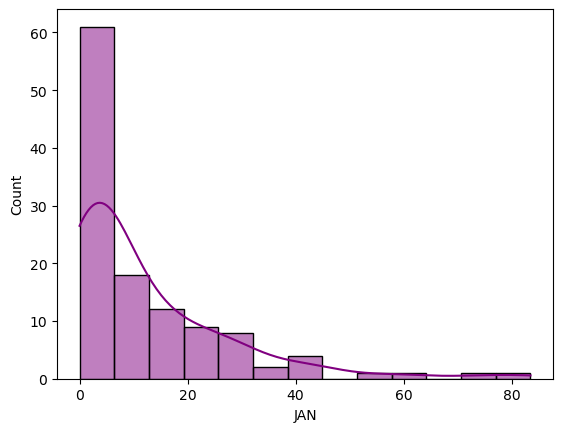

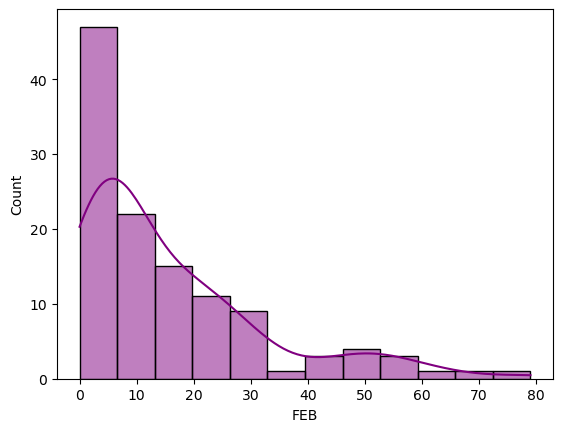

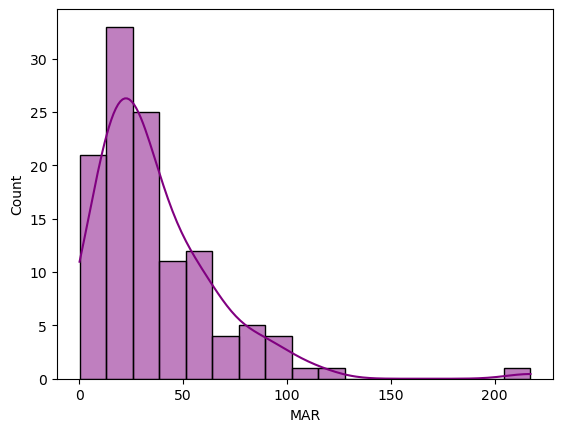

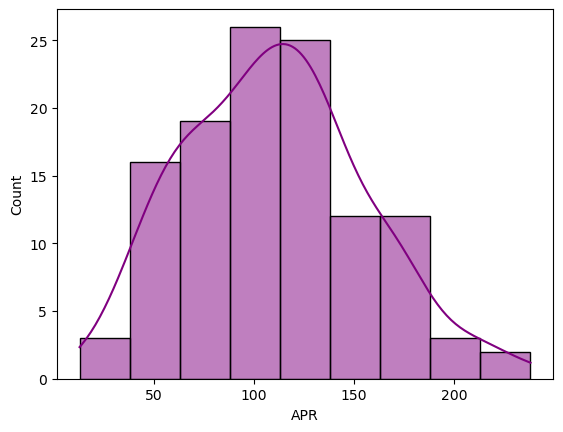

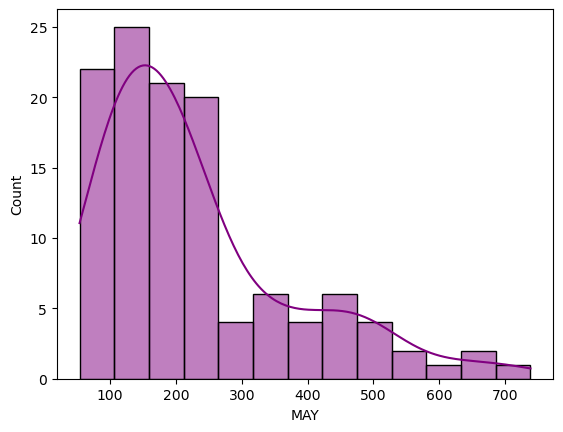

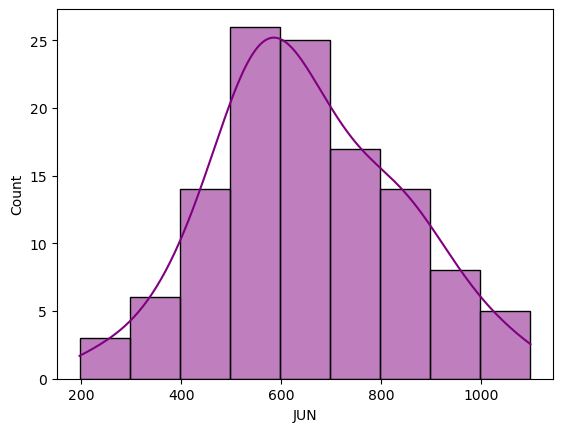

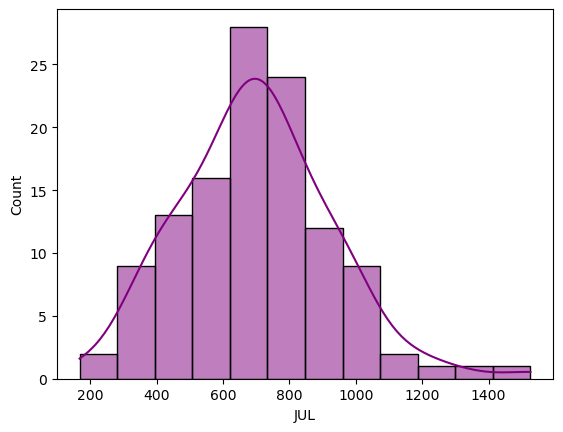

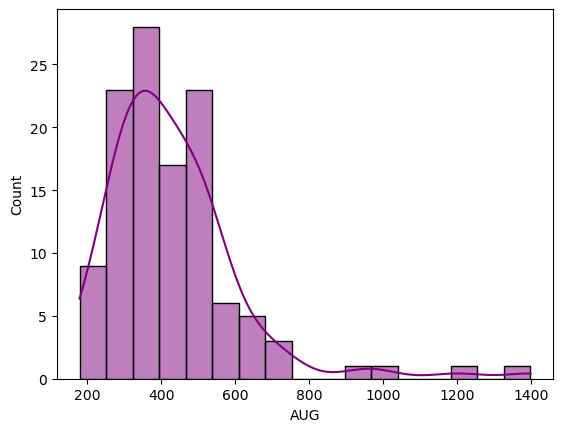

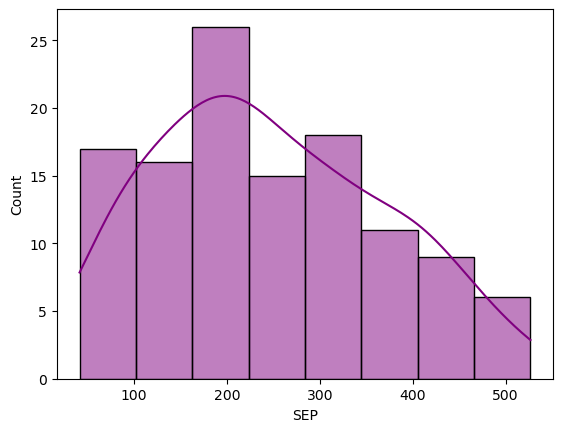

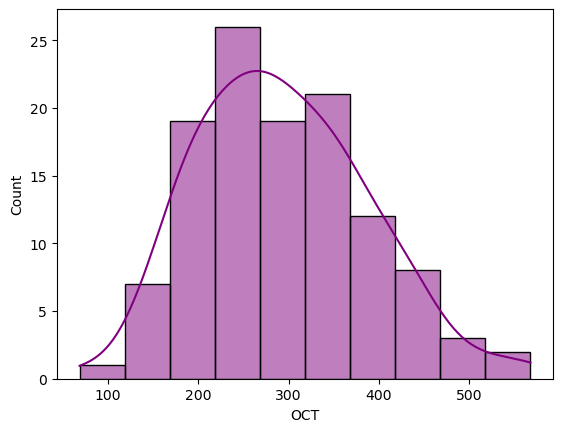

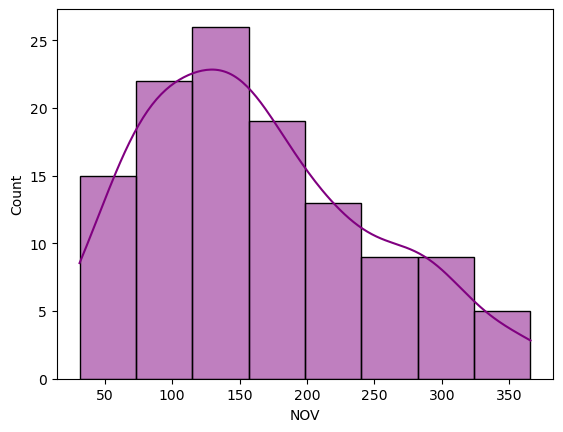

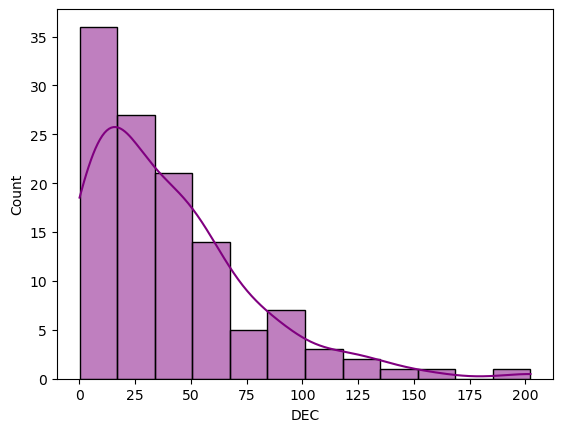

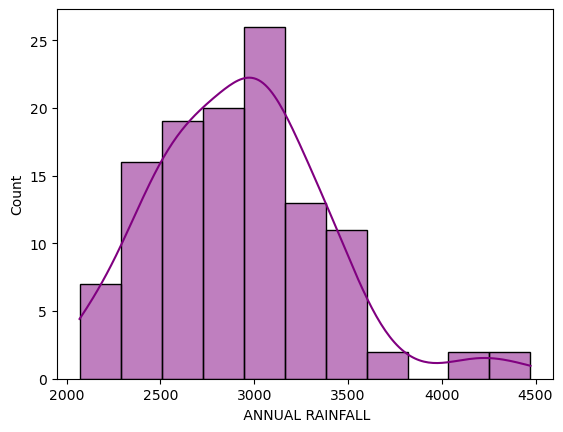

In [21]:
hist_skew(floods,numcols)

In [22]:
floods.drop('SUBDIVISION',axis=1,inplace=True)

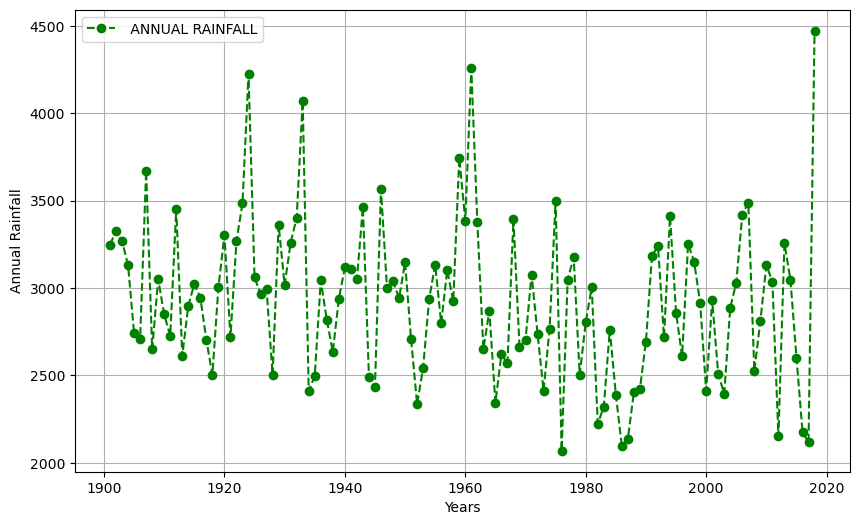

In [23]:
plt.figure(figsize=(10,6))
plt.plot('YEAR',' ANNUAL RAINFALL',data=floods,marker='o',color='Green',linestyle='--',)
plt.grid(True)
plt.xlabel('Years')
plt.ylabel("Annual Rainfall")
plt.legend()

plt.show()

In [24]:
fg=floods.groupby('FLOODS')

In [25]:
fg=fg[' ANNUAL RAINFALL'].get_group('YES')

In [26]:
fg.describe()

count      60.000000
mean     3269.028333
std       332.461425
min      2923.100000
25%      3042.275000
50%      3164.100000
75%      3395.275000
max      4473.000000
Name:  ANNUAL RAINFALL, dtype: float64

In [52]:
floods[floods[' ANNUAL RAINFALL']== 4473]

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
117,2018,29.1,52.1,48.6,116.4,183.8,625.4,1048.5,1398.9,423.6,356.1,125.4,65.1,4473.0,1


- Found out that An average of Annual Rainfall which is 3223.75 results in flood
- during these Years kerala have faced flood for 60 times
- Annual Rainfall in 2018 was 4473 which was the great flood occured among the century which result in the death over 483 people and 15 went missing

# ANALYSIS ON SEASONS OF KERALA

## Summer in kerala
- During the summer months, Kerala experiences high temperatures and humidity. The temperatures can range from warm to hot, and this period often sees the arrival of the southwest monsoon.

#### Summer months analysis

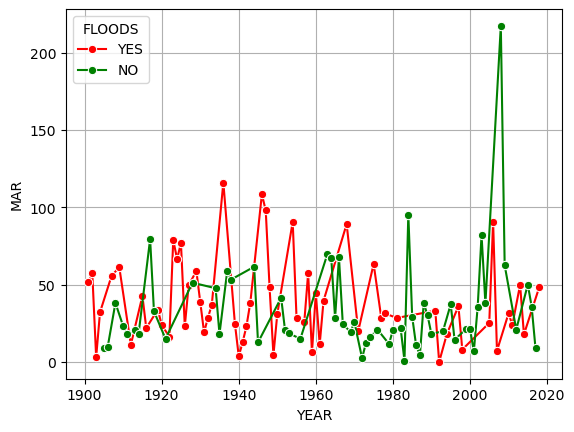

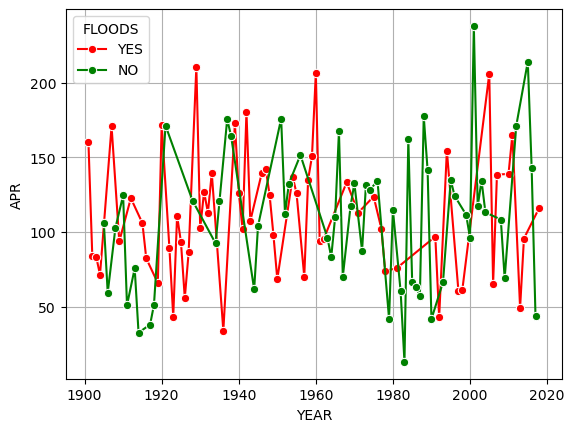

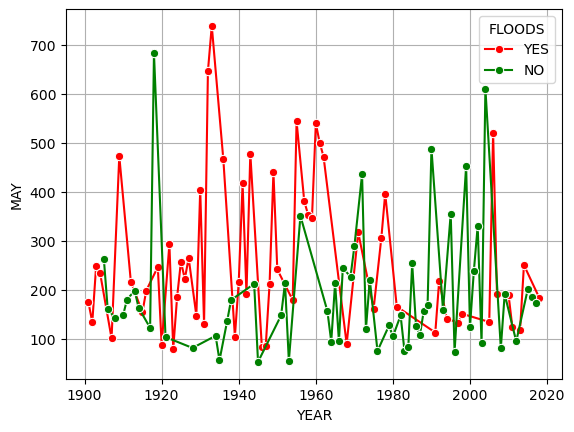

In [28]:
summer=floods[['MAR','APR','MAY']]
custom=['red','green']
for i in summer:
    sns.lineplot(x='YEAR',y=i,data=floods,sizes=10,marker='o',palette=custom,hue='FLOODS')
    plt.grid(True)
    plt.show()

## Monsoon in kerala
- The southwest monsoon, which brings heavy rainfall, usually arrives in June and continues through September. Kerala receives a significant amount of rainfall during this season, contributing to lush green landscapes.

#### Monsoon months Analysis

#### Monsoon in Kerala, typically spanning from June to September, is a vital climatic phenomenon crucial for the region's agriculture and water resources. However, it also poses significant challenges, especially regarding the risk of floods. sks.

### Flood Risks:

- Geographical Factors: Kerala's terrain, characterized by steep slopes and an intricate network of rivers, enhances the vulnerability to flooding during heavy rains.
- Intense Rainfall: The monsoon often brings exceptionally heavy rainfall, leading to swollen rivers and waterlogged areas.
- Urbanization: Rapid urbanization and inadequate drainage systems contribute to waterlogging in urban areas, exacerbating flood risks.

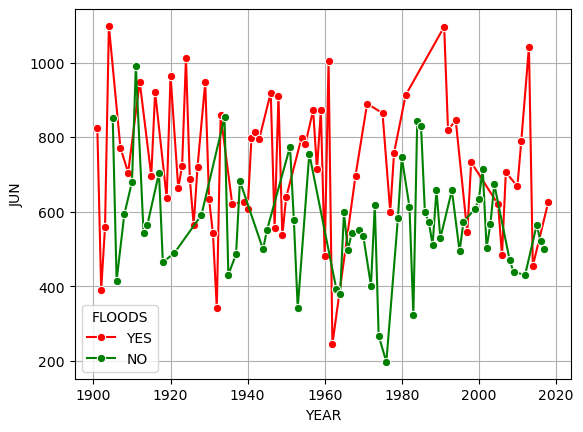

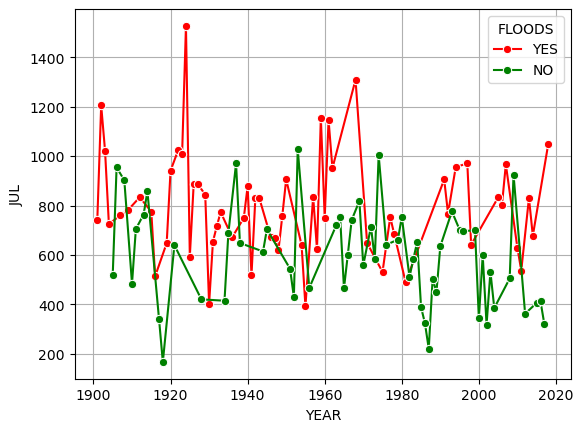

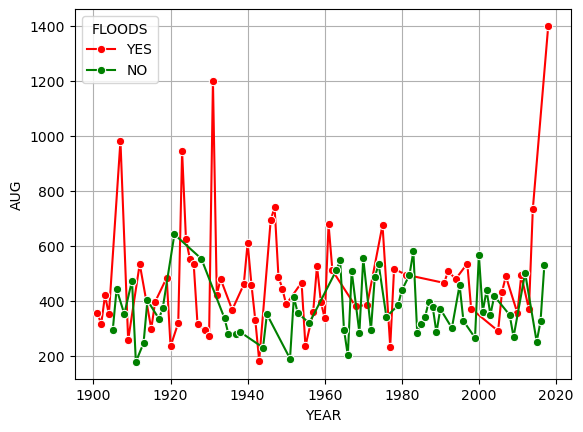

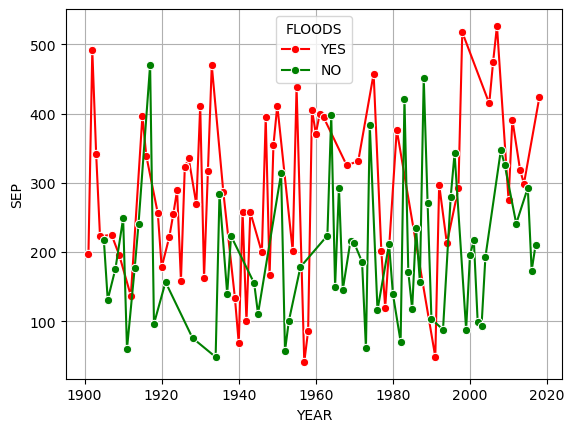

In [29]:
monsoon=floods[['JUN','JUL','AUG','SEP']]
custom=['red','green']
for i in monsoon:
    sns.lineplot(x='YEAR',y=i,data=floods,sizes=10,marker='o',palette=custom,hue='FLOODS')
    plt.grid(True)
    plt.show()

## Post Monsoon 
- After the monsoon, the post-monsoon season is characterized by gradually reducing rainfall and more moderate temperatures. The weather becomes relatively pleasant during these months.

#### Post-Mosoon months Analysis

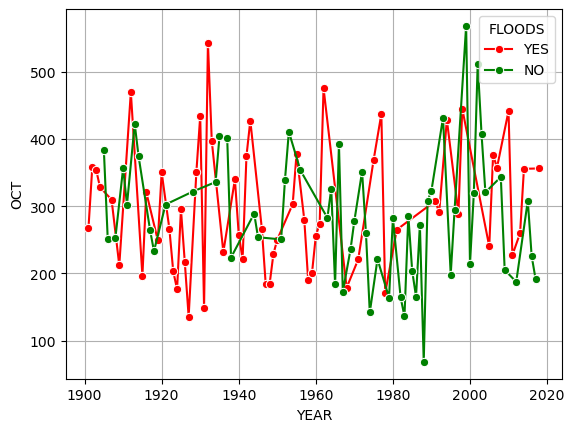

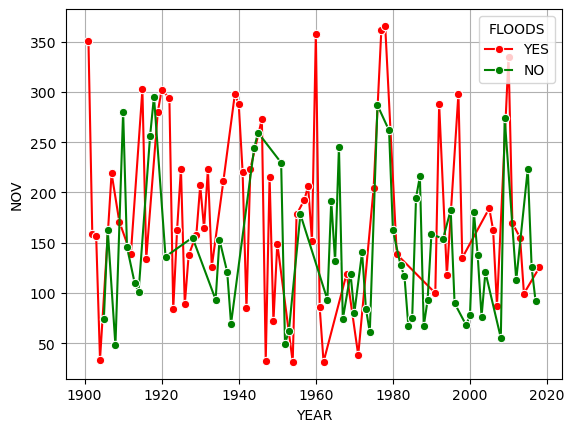

In [30]:
post_mons=floods[['OCT','NOV']]
custom=['red','green']
for i in post_mons:
    sns.lineplot(x='YEAR',y=i,data=floods,sizes=10,marker='o',palette=custom,hue='FLOODS')
    plt.grid(True)
    plt.show()

## Winter in Kerala
- Winter in Kerala is characterized by cooler and drier weather. While temperatures are not extremely low, the climate is more comfortable, making it a popular time for tourism.

#### winter months analysis

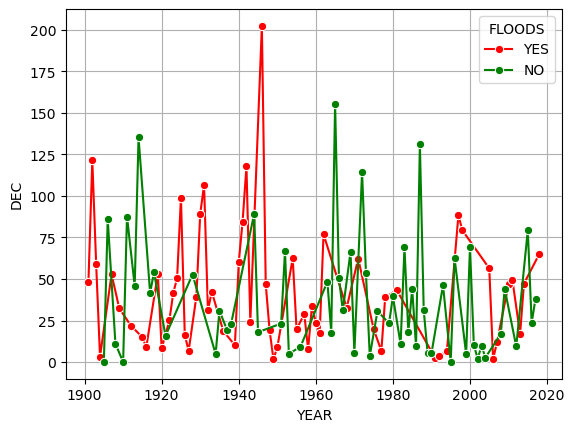

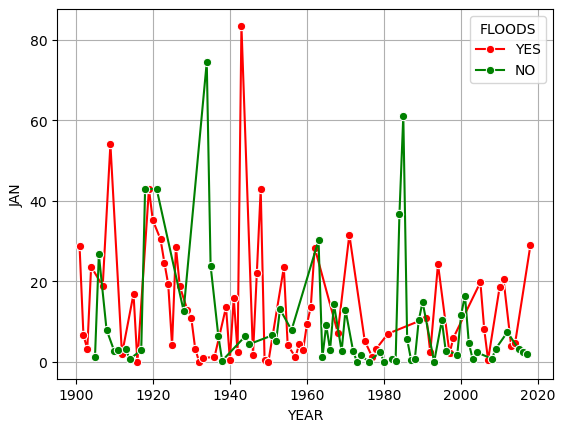

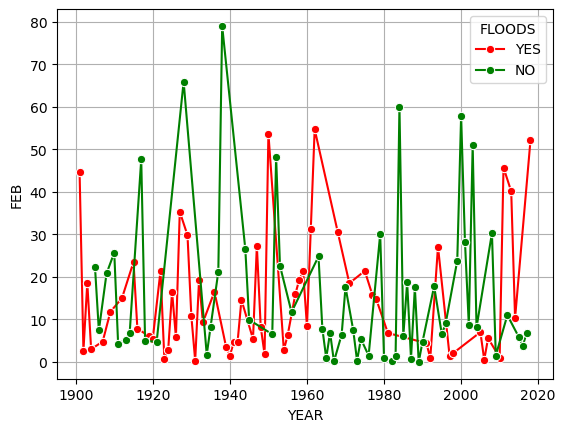

In [31]:
winter=floods[['DEC','JAN','FEB']]
custom=['red','green']
for i in winter:
    sns.lineplot(x='YEAR',y=i,data=floods,sizes=10,marker='o',palette=custom,hue='FLOODS')
    plt.grid(True)
    plt.show()

In [32]:
fl=floods.corr()

<Axes: >

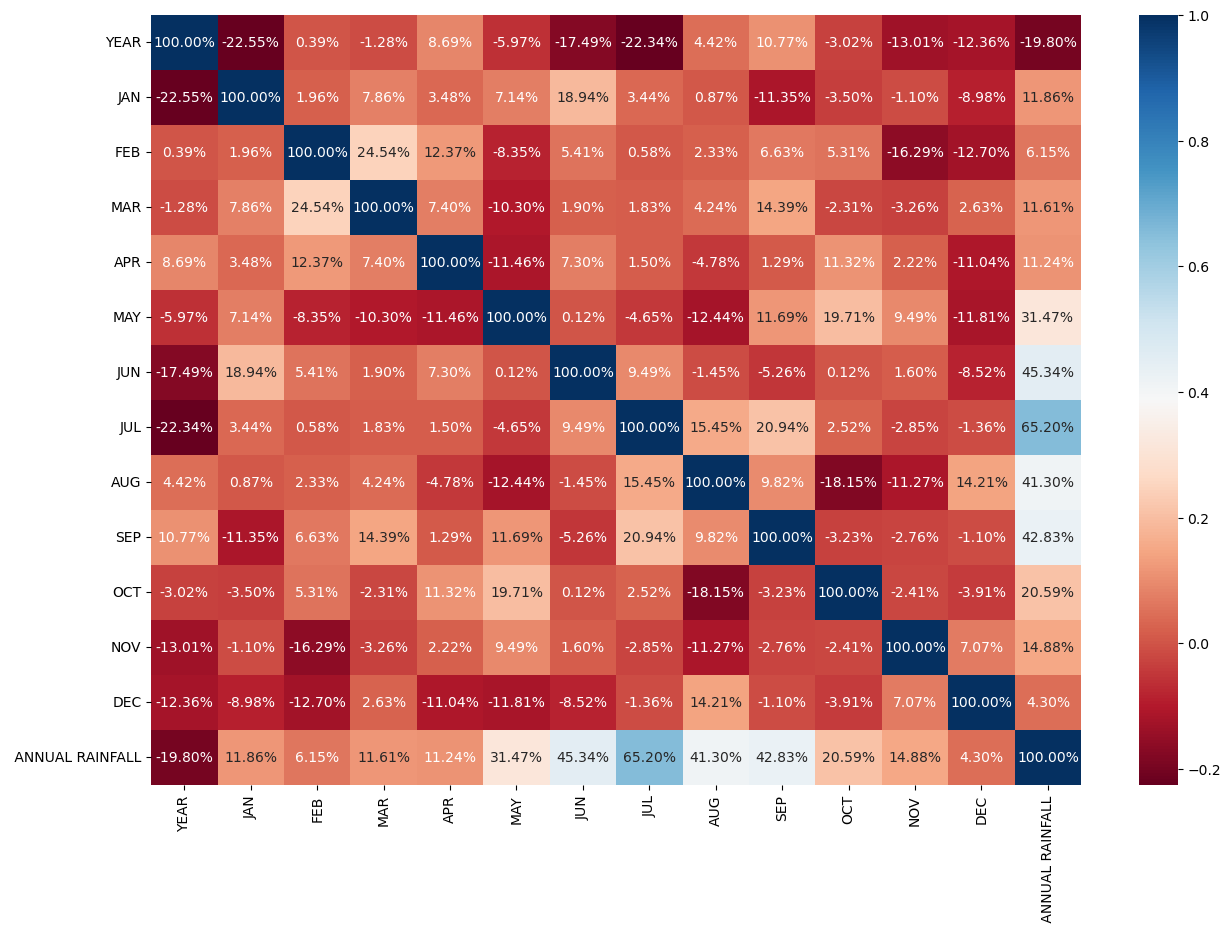

In [33]:
plt.figure(figsize=(15,10))
sns.heatmap(fl,cmap='RdBu',annot=True,fmt='.2%')

- It is found that rainfall in monsoon are the main reason to result in occurance of flood in the corresponding year
- while checking the correlation we can see that July is 66% related to the annual rainfal ,Hence the increase in rainfall of july gives the result in increase in Annual Rainfall of the perticular year
- Annual rainfall minimum of 2923.1 can lead to flood, if the Rainfall amount in July increases which result in increase in the Annual rainfall and if it cross above the minimum value it leads to flood.
- Winter season have the less relation with both Floods and Annual Rainfall, as we can say that it is the best season for Tourism, where kerala aka 'Gods Own Country' stands at its peak in nature beauty

### Splitting Target and Independent features

In [34]:
X=floods.iloc[:,0:-1]

In [35]:
X.columns

Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', ' ANNUAL RAINFALL'],
      dtype='object')

In [36]:
X

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4
114,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6
115,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6
116,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1


In [37]:
cols=['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', ' ANNUAL RAINFALL']

In [38]:
floods['FLOODS']=floods['FLOODS'].apply(lambda x: 0 if x == 'NO' else 1)

In [39]:
y=floods['FLOODS']

In [40]:
y

0      1
1      1
2      1
3      1
4      0
      ..
113    1
114    0
115    0
116    0
117    1
Name: FLOODS, Length: 118, dtype: int64

In [41]:
y.value_counts()

1    60
0    58
Name: FLOODS, dtype: int64

- The data is not Imbalanced, therefore can be processed in same

# Model Creation

### Splitting the data: Train_Test_Split

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=32)

In [44]:
# from sklearn.preprocessing import MinMaxScaler
# minmax = MinMaxScaler()
# x_train_normal = minmax.fit_transform(x_train)
# x_test_normal = minmax.transform(x_test)

In [45]:
# x_train_normal

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler=StandardScaler()

In [53]:
# X[cols]=scaler.fit_transform(X[cols])
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.fit_transform(x_test)

## Model Selection

### Logistic Regression
- Models the relationship between features and a categorical target variable (binary or multi-class) using a sigmoid function. Outputs probabilities for each class. Logistic regression is a classification algorithm.

### Support Vector Machine
- Creates a hyperplane that best separates data points of different classes.A hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points. Can handle non-linear data using kernel functions.

### K-Nearest Neighbor
- Classifies a data point based on the majority vote of its k nearest neighbors in the training data.it predicts the target label by finding the nearest neighbor class. The closest class will be identified using the distance measures like Euclidean distance.

### Random Forest Classifier
- Ensembles a collection of decision trees, where each tree votes on the classification of a data point. The final prediction is based on the majority vote

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

### Evaluation Metrix

- **Accuracy:** The most basic metric – the proportion of correct predictions (True Positives + True Negatives) out of total predictions
- **Precision:** Focuses on the accuracy of positive predictions. It measures the proportion of true positives out of all predictions labeled as positive (True Positives / (True Positives + False Positives)).
- **Recall:** Emphasizes the completeness of positive identifications. It measures the proportion of true positives out of all actual positive cases in the data (True Positives / (True Positives + False Negatives)).
- **ROC AUC Score (Area Under the ROC Curve):** Represents the probability of the model ranking a randomly chosen positive instance higher than a negative one.
- <u>**Confusion matrix:**</u> This is a binary classifier. A confusion matrix can be of any size depending upon the different number of parameters inputted (labels in our case). The confusion matrix in our case is a 2 × 2 matrix. for each class

In [55]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,precision_score,roc_curve,confusion_matrix

### K-fold Cross validation using cross_val_score
- This function from scikit-learn is a valuable tool for evaluating the performance of your machine learning model.
- Performs k-fold cross-validation. It splits your data into k folds (subsets).
- Trains the model on k-1 folds and tests it on the remaining fold.
- Repeats this process k times, using each fold for testing once.
- Calculates a performance metric (e.g., accuracy, F1-score) for each fold.
- Returns the average score across all folds, providing a more robust estimate of model performance on unseen data compared to a single train-test split.

In [56]:
from sklearn.model_selection import cross_val_score

In [57]:
models = LogisticRegression(max_iter=1000),SVC(kernel='linear'),KNeighborsClassifier(),RandomForestClassifier()

In [58]:
scoring = {'accuracy': 'accuracy', 'precision': 'precision_macro', 'recall': 'recall_macro'}

In [66]:
def kfold_model(models):
    mean_accuracies = []
    model_names = [str(model).split('(')[0] for model in models]

    # calculating the mean accuracy of all the models using cross validation in for loop
    for model in models:
        cv_score=cross_val_score(model,X,y,cv=5)
        mean_acc=round((sum(cv_score)/5)*100,2)
        mean_accuracies.append(mean_acc)
        print('Cross validaytion for',model,':',cv_score)
        print("mean accuracy :",mean_acc)

    #plotting the graph
    sns.barplot(x=model_names, y=mean_accuracies,palette='Set2')
    plt.xlabel('Models')
    plt.ylabel('Mean Accuracy (%)')
    plt.title('Mean Accuracy of Different Models')
    plt.xticks(rotation=45)
    plt.show()

Cross validaytion for LogisticRegression(max_iter=1000) : [0.95833333 1.         1.         1.         0.91304348]
mean accuracy : 97.43
Cross validaytion for SVC(kernel='linear') : [0.95833333 0.91666667 0.875      1.         0.95652174]
mean accuracy : 94.13
Cross validaytion for KNeighborsClassifier() : [0.95833333 0.95833333 1.         0.95652174 0.91304348]
mean accuracy : 95.72
Cross validaytion for RandomForestClassifier() : [1.         1.         1.         1.         0.95652174]
mean accuracy : 99.13


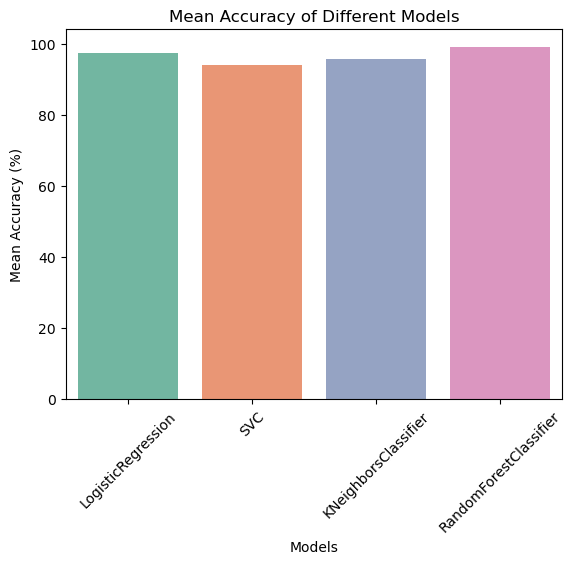

In [67]:
kfold_model(models)

- The accuracy of Logistic Regression is 97,SVC is 94,KNN is 95 and Random forest is 99. Hence, Random Forest Classifier performs better than other models
- Therefore taking Random Forest Classifier as the model and re-checking the performance of the model by using other evaluation metrics such as Confusion metrix and ROC_AUC score

## Random Forest Classifier

In [73]:
rmf = RandomForestClassifier(max_depth=3,random_state=0)
rmf_clf = rmf.fit(X_train_scaled,y_train)
rmf_clf

RandomForestClassifier(max_depth=3, random_state=0)

In [74]:
rmf_clf.fit(X_train_scaled,y_train)

RandomForestClassifier(max_depth=3, random_state=0)

In [75]:
y_pred = rmf_clf.predict(X_test_scaled)

In [76]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0], dtype=int64)

Recall score: 71.43%
Precision: 1.00
ROC AUC score: 85.71%


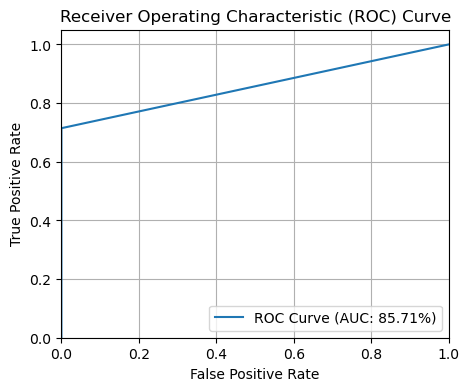

confusion metrix is:
 [[15  0]
 [ 6 15]]


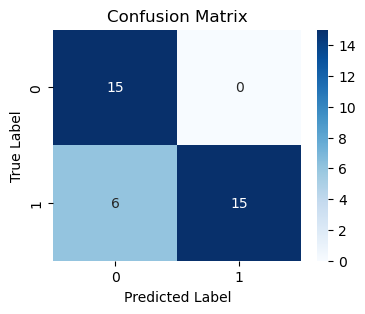

In [77]:
# Calculate recall score
recall = recall_score(y_test, y_pred) * 100
print("Recall score: {:.2f}%".format(recall))

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred) * 100
print("ROC AUC score: {:.2f}%".format(roc_auc))

# Create confusion matrix
con_mat = confusion_matrix(y_test, y_pred)

# Plot ROC AUC curve (assuming you have the predicted probabilities)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label='ROC Curve (AUC: {:.2f}%)'.format(roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.xlim(0, 1)
plt.ylim(0, 1.05)
plt.show()

# Plot confusion matrix heatmap
plt.figure(figsize=(4,3))
print('confusion metrix is:\n',con_mat)
sns.heatmap(con_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

- High TP and TN indicate good overall performance in classifying both flood and normal rainy situation.
- where TP is the situation when flood occuered and TN is the absence of flood.
- By finding all the evaluation metrix it is found that Random forest classifier suits better in making predction compared to other models